<a href="https://colab.research.google.com/github/Neelhmodi/CODSOFT_INTERNSHIP/blob/main/CODSOFT_TASK_5_CREDIT_CARD_FRAUD_DETECTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Necessary Libraries.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler

Load Data and shows first 5 rows of data.

In [2]:
credit_card_df = pd.read_csv('/content/Creditcard.csv')
credit_card_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


check the number of rows and columns in dataset

In [3]:
credit_card_df.shape

(96028, 31)

Extract all information about data.

In [4]:
credit_card_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96028 entries, 0 to 96027
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    96028 non-null  int64  
 1   V1      96028 non-null  float64
 2   V2      96028 non-null  float64
 3   V3      96028 non-null  float64
 4   V4      96028 non-null  float64
 5   V5      96028 non-null  float64
 6   V6      96028 non-null  float64
 7   V7      96028 non-null  float64
 8   V8      96028 non-null  float64
 9   V9      96028 non-null  float64
 10  V10     96028 non-null  float64
 11  V11     96028 non-null  float64
 12  V12     96028 non-null  float64
 13  V13     96028 non-null  float64
 14  V14     96028 non-null  float64
 15  V15     96028 non-null  float64
 16  V16     96028 non-null  float64
 17  V17     96028 non-null  float64
 18  V18     96028 non-null  float64
 19  V19     96028 non-null  float64
 20  V20     96028 non-null  float64
 21  V21     96028 non-null  float64
 22

Calculates statistical values

In [5]:
credit_card_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,96028.000000,96028.000000,96028.000000,96028.000000,96028.000000,96028.000000,96028.000000,96028.000000,96028.000000,96028.000000,...,96028.000000,96028.000000,96028.000000,96028.000000,96028.000000,96028.000000,96028.000000,96028.000000,96027.000000,96027.000000
mean,41438.681645,-0.263369,-0.036018,0.676141,0.163561,-0.279330,0.094208,-0.107822,0.055990,-0.040733,...,-0.030339,-0.107821,-0.037425,0.009606,0.132055,0.026634,0.000330,0.001443,98.578468,0.002281
std,16662.319067,1.865167,1.659726,1.333228,1.352185,1.363565,1.302720,1.219630,1.205999,1.126115,...,0.719875,0.634498,0.639699,0.594742,0.441942,0.495251,0.396349,0.327728,266.796974,0.047701
min,0.000000,-56.407510,-72.715728,-33.680984,-5.172595,-42.147898,-26.160506,-31.764946,-73.216718,-9.283925,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.534330,-9.390980,-9.617915,0.000000,0.000000
25%,33020.000000,-1.028355,-0.602188,0.177782,-0.714966,-0.898342,-0.647780,-0.600324,-0.138469,-0.697555,...,-0.224413,-0.529526,-0.177034,-0.322680,-0.132383,-0.325489,-0.062863,-0.005541,7.580000,0.000000
50%,43458.000000,-0.259972,0.075666,0.755601,0.191204,-0.313955,-0.156728,-0.069051,0.073036,-0.114651,...,-0.057561,-0.082626,-0.049533,0.064990,0.170218,-0.071036,0.009683,0.023308,26.620000,0.000000
75%,54532.250000,1.153099,0.733041,1.379284,1.034442,0.251537,0.486982,0.416292,0.358134,0.568184,...,0.119842,0.309433,0.081566,0.406392,0.419958,0.302103,0.082861,0.076408,89.750000,0.000000
max,65574.000000,1.960497,18.902453,4.226108,16.715537,34.801666,22.529298,36.677268,20.007208,10.392889,...,22.614889,10.503090,19.002942,4.014444,5.541598,3.517346,12.152401,33.847808,19656.530000,1.000000


Drop Unnecessary values

In [6]:
new_credit_card_df = credit_card_df.drop(['Time'], axis=1)

Load Data and shows first 5 rows of data in new dataset.

In [7]:
new_credit_card_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


check the number of rows and columns in new dataset

In [8]:
new_credit_card_df.shape

(96028, 30)

Mark null values as True and returns sum of number of True values in each column

In [9]:
new_credit_card_df.isnull().sum()

V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    1
Class     1
dtype: int64

Handling Null Values and Pre Processing the dataset.

In [10]:
new_credit_card_df['Amount'].fillna(new_credit_card_df['Amount'].mean(), inplace=True)
new_credit_card_df['Class'].fillna(new_credit_card_df['Class'].mode()[0], inplace=True)
new_credit_card_df.isnull().sum()

V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Calculates statistical values for new data

In [11]:
new_credit_card_df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,96028.000000,96028.000000,96028.000000,96028.000000,96028.000000,96028.000000,96028.000000,96028.000000,96028.000000,96028.000000,...,96028.000000,96028.000000,96028.000000,96028.000000,96028.000000,96028.000000,96028.000000,96028.000000,96028.000000,96028.000000
mean,-0.263369,-0.036018,0.676141,0.163561,-0.279330,0.094208,-0.107822,0.055990,-0.040733,-0.024677,...,-0.030339,-0.107821,-0.037425,0.009606,0.132055,0.026634,0.000330,0.001443,98.578468,0.002281
std,1.865167,1.659726,1.333228,1.352185,1.363565,1.302720,1.219630,1.205999,1.126115,1.073748,...,0.719875,0.634498,0.639699,0.594742,0.441942,0.495251,0.396349,0.327728,266.795585,0.047701
min,-56.407510,-72.715728,-33.680984,-5.172595,-42.147898,-26.160506,-31.764946,-73.216718,-9.283925,-18.271168,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.534330,-9.390980,-9.617915,0.000000,0.000000
25%,-1.028355,-0.602188,0.177782,-0.714966,-0.898342,-0.647780,-0.600324,-0.138469,-0.697555,-0.497854,...,-0.224413,-0.529526,-0.177034,-0.322680,-0.132383,-0.325489,-0.062863,-0.005541,7.580000,0.000000
50%,-0.259972,0.075666,0.755601,0.191204,-0.313955,-0.156728,-0.069051,0.073036,-0.114651,-0.094890,...,-0.057561,-0.082626,-0.049533,0.064990,0.170218,-0.071036,0.009683,0.023308,26.620000,0.000000
75%,1.153099,0.733041,1.379284,1.034442,0.251537,0.486982,0.416292,0.358134,0.568184,0.440014,...,0.119842,0.309433,0.081566,0.406392,0.419958,0.302103,0.082861,0.076408,89.752500,0.000000
max,1.960497,18.902453,4.226108,16.715537,34.801666,22.529298,36.677268,20.007208,10.392889,13.249433,...,22.614889,10.503090,19.002942,4.014444,5.541598,3.517346,12.152401,33.847808,19656.530000,1.000000


Data Visualization

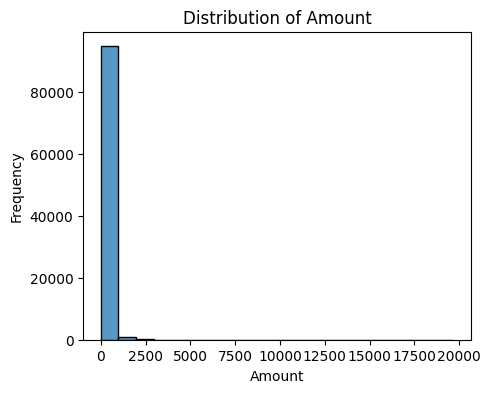

In [15]:
# Distribution of Amount
plt.figure(figsize=(5, 4))
sns.histplot(new_credit_card_df['Amount'], bins=20)
plt.title('Distribution of Amount')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

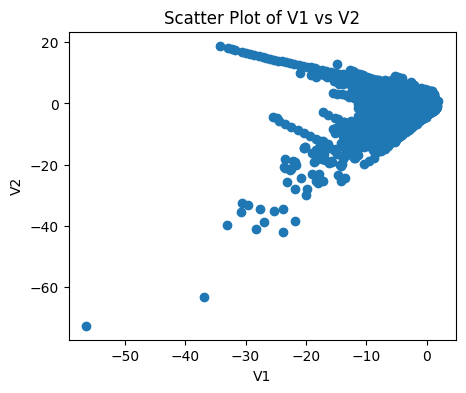

In [16]:
# Scatter plot of V1 vs V2
plt.figure(figsize=(5, 4))
plt.scatter(new_credit_card_df['V1'], new_credit_card_df['V2'])
plt.title('Scatter Plot of V1 vs V2')
plt.xlabel('V1')
plt.ylabel('V2')
plt.show()

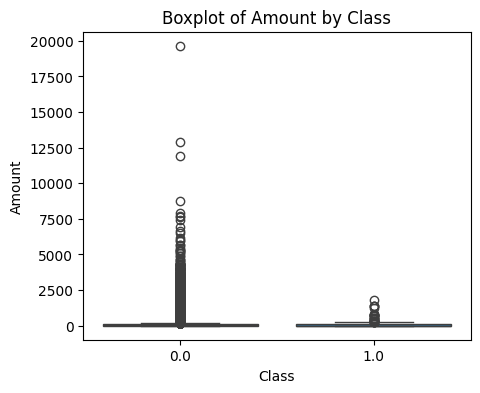

In [17]:
# Boxplot of Amount by Class
plt.figure(figsize=(5, 4))
sns.boxplot(x='Class', y='Amount', data=new_credit_card_df)
plt.title('Boxplot of Amount by Class')
plt.xlabel('Class')
plt.ylabel('Amount')
plt.show()

In [18]:
# Removing outliers using IQR method
Q1 = new_credit_card_df.quantile(0.25)
Q3 = new_credit_card_df.quantile(0.75)
IQR = Q3 - Q1
new_credit_card_df_without_outliers_IQR = new_credit_card_df[~((new_credit_card_df < (Q1 - 1.5 * IQR)) | (new_credit_card_df > (Q3 + 1.5 * IQR))).any(axis=1)].reset_index(drop=True)

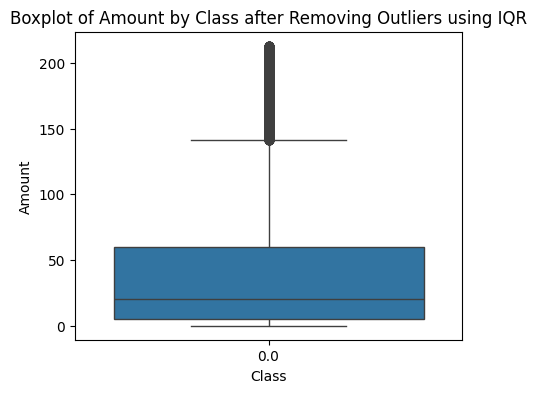

In [19]:
# Drawing boxplot of Amount by Class after removing outliers using IQR method
plt.figure(figsize=(5, 4))
sns.boxplot(x='Class', y='Amount', data=new_credit_card_df_without_outliers_IQR)
plt.title('Boxplot of Amount by Class after Removing Outliers using IQR')
plt.xlabel('Class')
plt.ylabel('Amount')
plt.show()

Deviding the data into Dependent and Independent variables.

In [20]:
x= new_credit_card_df.drop(['Class'], axis=1)
y= new_credit_card_df['Class']

In [21]:
print(x)

             V1        V2        V3        V4        V5        V6        V7  \
0     -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1      1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2     -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3     -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4     -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   
...         ...       ...       ...       ...       ...       ...       ...   
96023  1.018412  1.036663 -1.689814  1.315476  1.698436  0.528807  0.331715   
96024 -0.959931  1.322460  1.839904  0.864780 -0.511450 -0.385525  0.490475   
96025 -2.053944  1.825583  0.354028  0.427638 -0.813505  0.019283 -0.293483   
96026  1.208879  0.177732 -0.641514  1.513436  2.163592  4.067034 -0.622726   
96027  1.203618  0.206598  0.009321  0.562937 -0.230349 -1.240969  0.475019   

             V8        V9       V10  ...       V20 

In [22]:
print(y)

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
96023    0.0
96024    0.0
96025    0.0
96026    0.0
96027    0.0
Name: Class, Length: 96028, dtype: float64


Fechers Scaling

In [23]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)
datadet = pd.DataFrame(X_scaled, columns=x.columns)
datadet.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-0.587853,-0.022150,1.395272,0.898250,-0.043262,0.282626,0.284859,0.035413,0.359219,0.107541,...,0.271775,0.016714,0.607821,-0.114193,0.096382,-0.007955,-0.435637,0.336142,-0.068644,0.191314
1,0.780216,0.182060,-0.382278,0.210470,0.248869,-0.135539,0.023793,0.024139,-0.190649,-0.132525,...,-0.148319,-0.271488,-0.836651,0.216842,-0.587574,0.079458,0.200426,-0.023496,0.040524,-0.359410
2,-0.587074,-0.785763,0.822871,0.159904,-0.164179,1.309799,0.737345,0.158944,-1.308862,0.216365,...,0.630359,0.386648,1.386144,1.480137,-1.175117,-1.040180,-0.334641,-0.140489,-0.186727,1.049804
3,-0.376860,-0.089900,0.837710,-0.759406,0.197294,0.885073,0.283227,0.266540,-1.195525,-0.028196,...,-0.330456,-0.108300,0.178244,-0.239013,-1.992778,1.166045,-0.501895,0.157421,0.183123,0.093411
4,-0.479779,0.550548,0.654488,0.177102,-0.093772,0.001316,0.574573,-0.270750,0.762335,0.724337,...,0.477737,0.029044,1.428065,-0.156376,0.221376,-0.764956,0.960443,0.552780,0.652099,-0.107156


set imbalances data into balance data

In [24]:
new_credit_card_df['Class'].value_counts()

Class
0.0    95809
1.0      219
Name: count, dtype: int64

In [25]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler()
X_resampled, y_resampled = rus.fit_resample(x, y)
print(y_resampled.value_counts())

Class
0.0    219
1.0    219
Name: count, dtype: int64


Deviding the cleaned data into training and testing sets.

In [26]:
x_train, x_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, stratify=y_resampled, random_state=42)

check the dataset is linearly separate or not

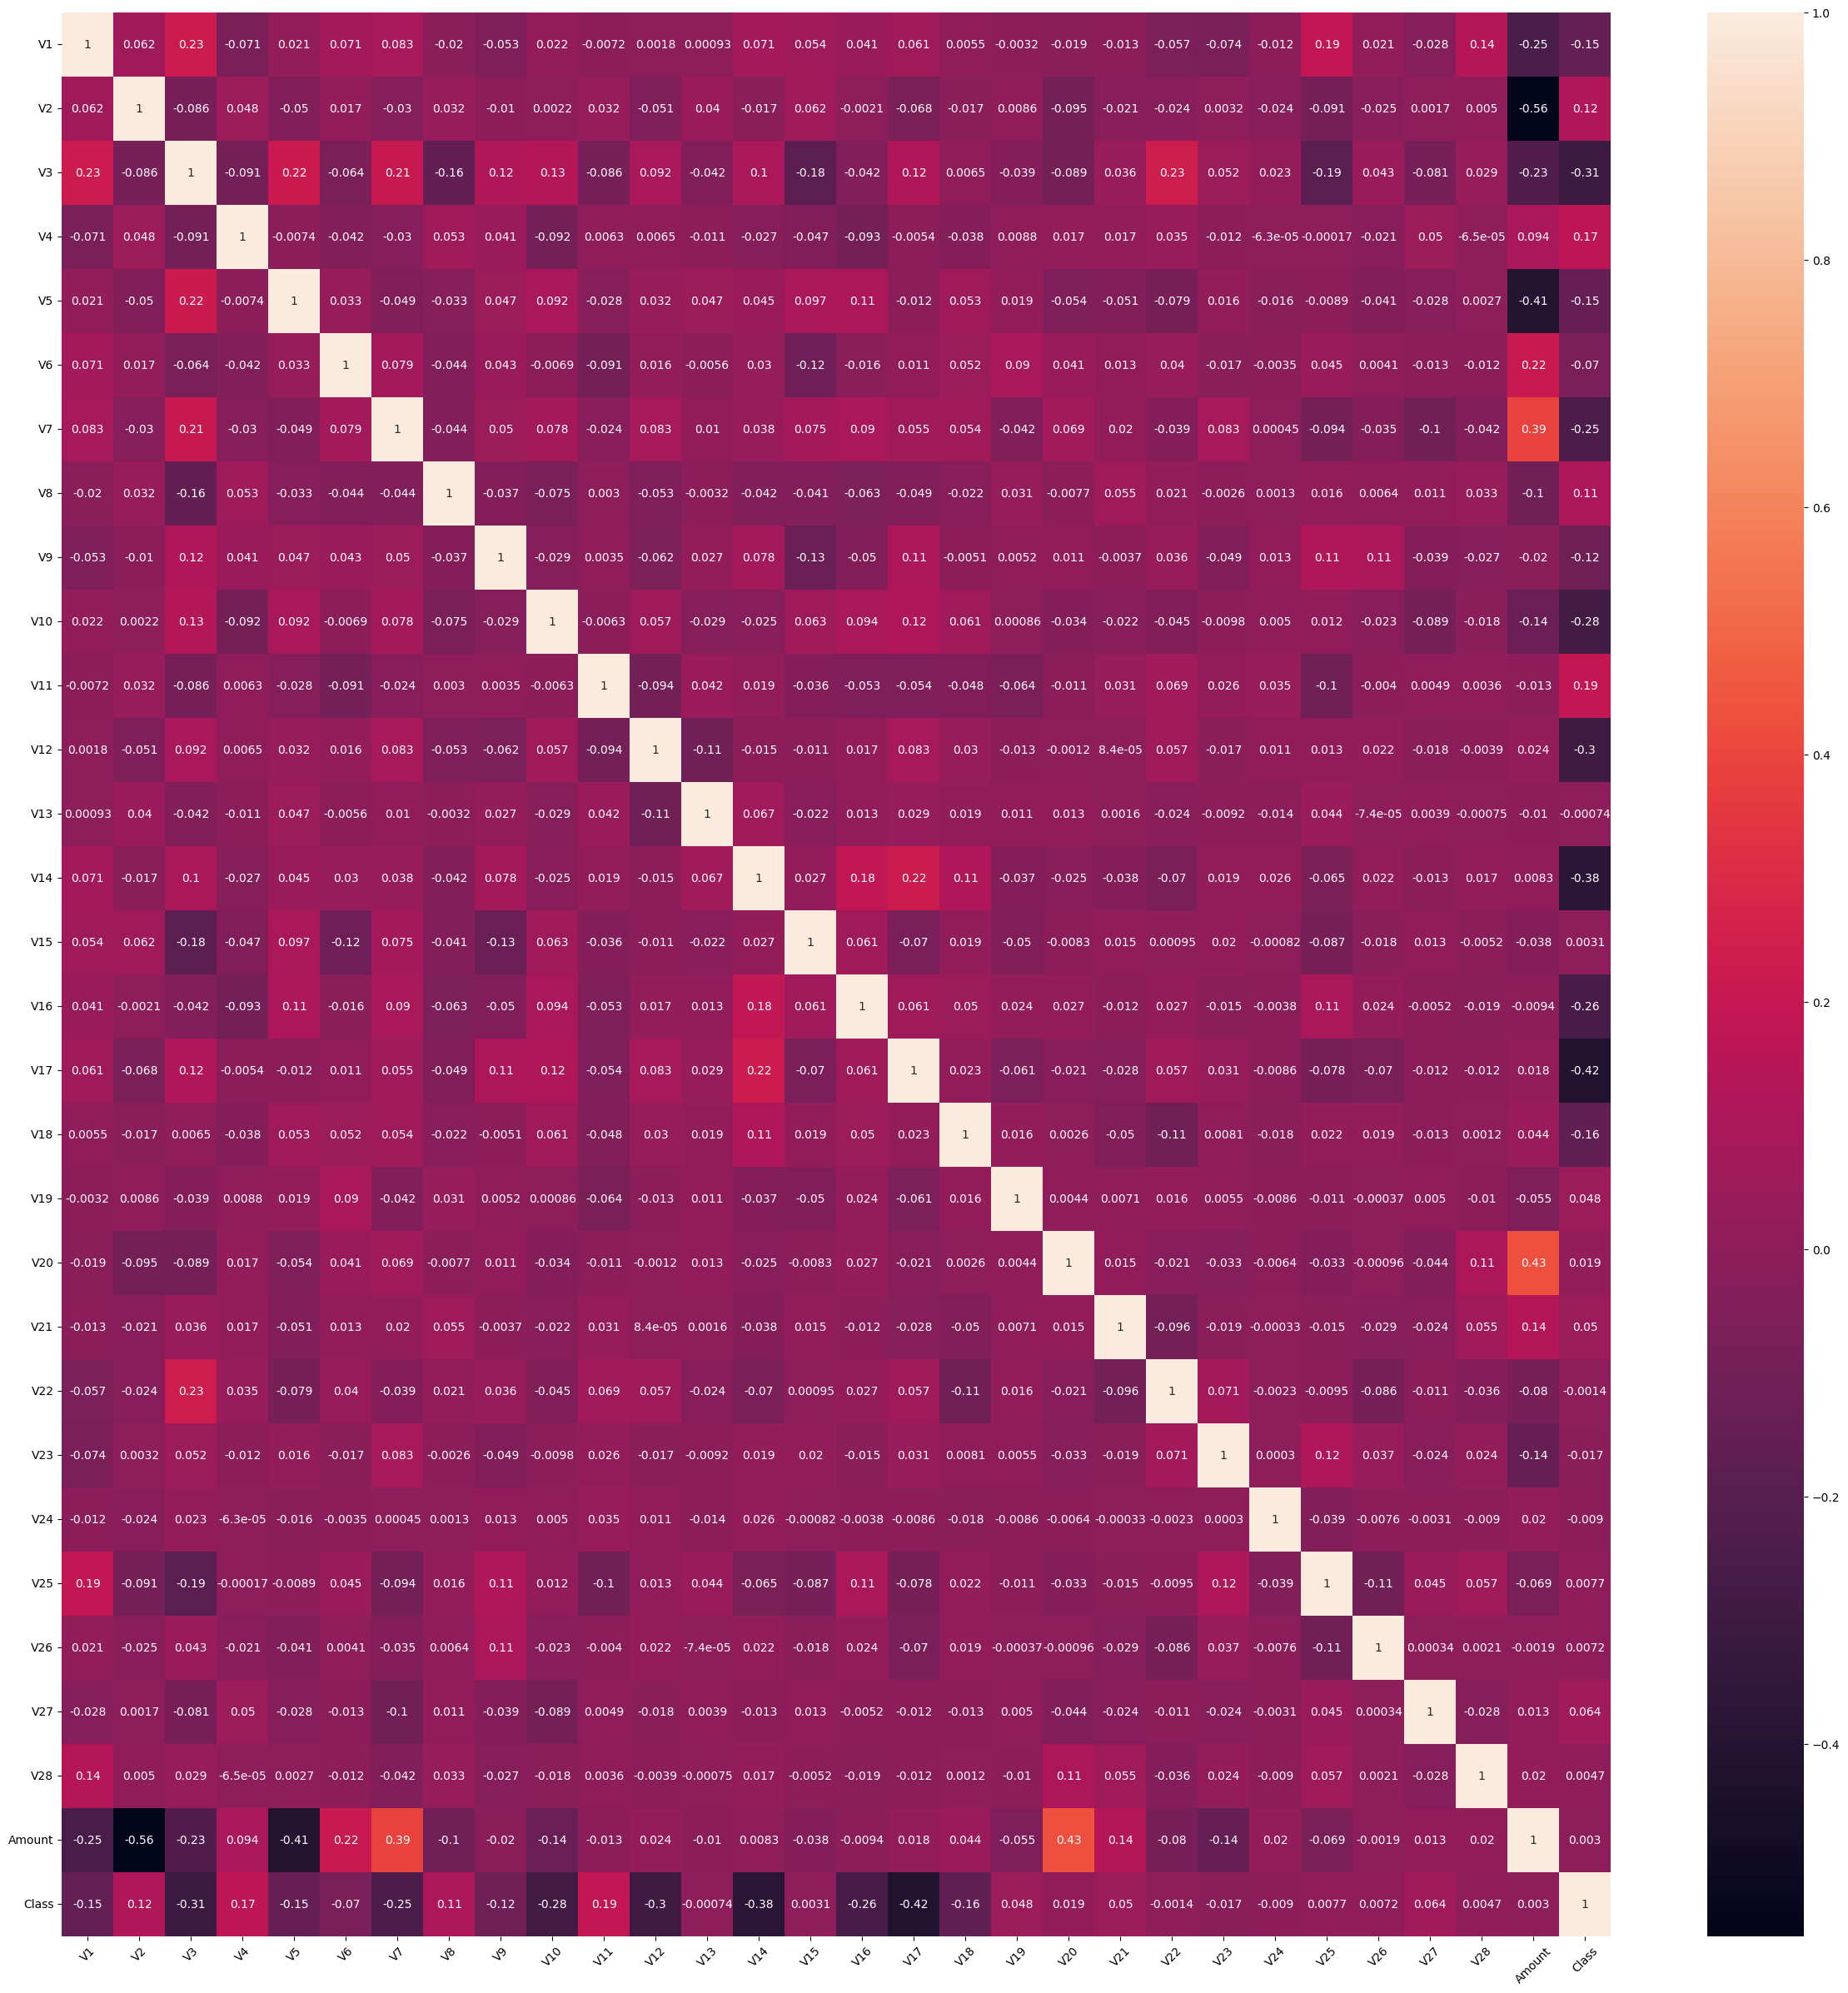

In [27]:
plt.figure(figsize=(30, 30))
sns.heatmap(new_credit_card_df.corr(), annot=True)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

create first ML model using DecisionTreeClassifier

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
Decision_model = DecisionTreeClassifier(criterion='gini', max_depth=8,splitter='random')
Decision_model.fit(x_train, y_train)

df_tree = {
    'max_depth':[i for i in range(1, 10)],
    'criterion':['gini', 'entropy'],
    'splitter':['best', 'random']
}

grid_search = GridSearchCV(Decision_model, df_tree, cv=5)
grid_search.fit(x_train, y_train)
print(grid_search.best_params_)
Decision_model.fit(x_train, y_train)

{'criterion': 'gini', 'max_depth': 8, 'splitter': 'random'}


DecisionTreeClassifier(criterion='entropy', max_depth=4, splitter='random')

predict the model

In [29]:
Decision_model.predict(x_test)

array([1., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
       1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1.,
       0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0.,
       0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1.,
       0., 1., 0.])

check Accuracy , precision , Recall and F1 scroll and also check Confusion Matrix

Accuracy Score is :  93.17999999999999
Precision Score is :  100.0
Recall Score is :  86.36
F1 Score is :  92.67999999999999
Confusion Matrix is:


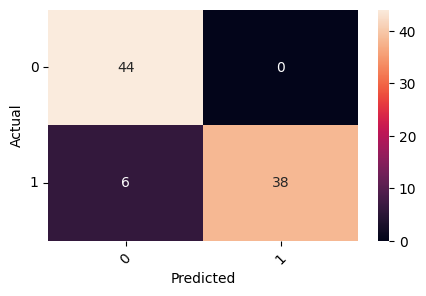

In [30]:
print('Accuracy Score is : ',round(accuracy_score(y_test, Decision_model.predict(x_test)),4)*100)
print('Precision Score is : ',round(precision_score(y_test, Decision_model.predict(x_test)),4)*100)
print('Recall Score is : ',round(recall_score(y_test, Decision_model.predict(x_test)),4)*100)
print('F1 Score is : ',round(f1_score(y_test, Decision_model.predict(x_test)),4)*100)
print('Confusion Matrix is:')
plt.figure(figsize=(5,3))
sns.heatmap(confusion_matrix(y_test, Decision_model.predict(x_test)), annot=True)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

create second ML model using RandomForestClassifier

In [31]:
from sklearn.ensemble import RandomForestClassifier
Random_model = RandomForestClassifier(criterion='gini',max_depth=8,n_estimators=9)

df_forest = {
    'n_estimators':[i for i in range(1, 10)],
    'criterion':['gini', 'entropy'],
    'max_depth':[i for i in range(1, 10)]
}

grid_search = GridSearchCV(Random_model, df_forest, cv=5)
grid_search.fit(x_train, y_train)
print(grid_search.best_params_)
Random_model.fit(x_train, y_train)

{'criterion': 'gini', 'max_depth': 8, 'n_estimators': 9}


RandomForestClassifier(max_depth=4, n_estimators=9)

predict the model

In [32]:
Random_model.predict(x_test)

array([1., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
       1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1.,
       0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0.,
       0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1.,
       0., 1., 0.])

check Accuracy , precision , Recall and F1 scroll and also check Confusion Matrix

Accuracy Score is :  92.05
Precision Score is :  97.44
Recall Score is :  86.36
F1 Score is :  91.57
Confusion Matrix is:


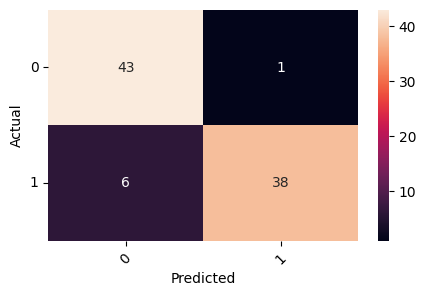

In [33]:
print('Accuracy Score is : ',round(accuracy_score(y_test, Random_model.predict(x_test)),4)*100)
print('Precision Score is : ',round(precision_score(y_test, Random_model.predict(x_test)),4)*100)
print('Recall Score is : ',round(recall_score(y_test, Random_model.predict(x_test)),4)*100)
print('F1 Score is : ',round(f1_score(y_test, Random_model.predict(x_test)),4)*100)
print('Confusion Matrix is:')
plt.figure(figsize=(5,3))
sns.heatmap(confusion_matrix(y_test, Random_model.predict(x_test)), annot=True)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

create third ML model using GradientBoostingClassifier

In [34]:
from sklearn.ensemble import GradientBoostingClassifier
Gradient_model = GradientBoostingClassifier(n_estimators=2, learning_rate=1, max_depth=2)

df_boost={
    'n_estimators':[i for i in range(1, 10)],
    'learning_rate':[i for i in range(1, 10)],
    'max_depth':[i for i in range(1, 10)]
}

grid_search = GridSearchCV(Gradient_model, df_boost, cv=5)
grid_search.fit(x_train, y_train)
print(grid_search.best_params_)
Gradient_model.fit(x_train, y_train)

{'learning_rate': 1, 'max_depth': 2, 'n_estimators': 7}


GradientBoostingClassifier(learning_rate=1, max_depth=5, n_estimators=3)

predict the model

In [35]:
Gradient_model.predict(x_test)

array([1., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1.,
       0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0.,
       0., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1.,
       0., 1., 0.])

check Accuracy , precision , Recall and F1 scroll and also check Confusion Matrix

Accuracy Score is :  90.91
Precision Score is :  97.37
Recall Score is :  84.09
F1 Score is :  90.24
Confusion Matrix is:


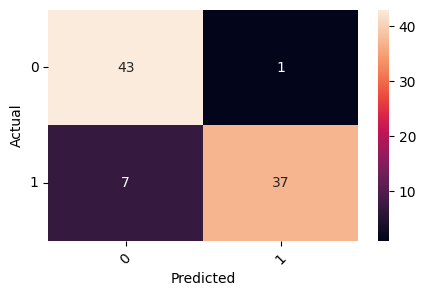

In [36]:
print('Accuracy Score is : ',round(accuracy_score(y_test, Gradient_model.predict(x_test)),4)*100)
print('Precision Score is : ',round(precision_score(y_test, Gradient_model.predict(x_test)),4)*100)
print('Recall Score is : ',round(recall_score(y_test, Gradient_model.predict(x_test)),4)*100)
print('F1 Score is : ',round(f1_score(y_test, Gradient_model.predict(x_test)),4)*100)
print('Confusion Matrix is:')
plt.figure(figsize=(5,3))
sns.heatmap(confusion_matrix(y_test, Gradient_model.predict(x_test)), annot=True)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

create four ML model using KNeiborsClassifier

In [37]:
from sklearn.neighbors import KNeighborsClassifier
df_knn = {
    'n_neighbors':[i for i in range(1, 10)]
}

grid_search = GridSearchCV(KNeighborsClassifier(), df_knn, cv=5)
grid_search.fit(x_train, y_train)
print(grid_search.best_params_)
KNN_model = KNeighborsClassifier(n_neighbors=1)
KNN_model.fit(x_train, y_train)

{'n_neighbors': 1}


KNeighborsClassifier(n_neighbors=1)

predict the model

In [38]:
print(KNN_model.predict(x_test))

[1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1.
 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1.
 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1.
 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0.]


check Accuracy , precision , Recall and F1 scroll and also check Confusion Matrix

Accuracy Score is :  89.77000000000001
Precision Score is :  94.87
Recall Score is :  84.09
F1 Score is :  89.16
Confusion Matrix is:


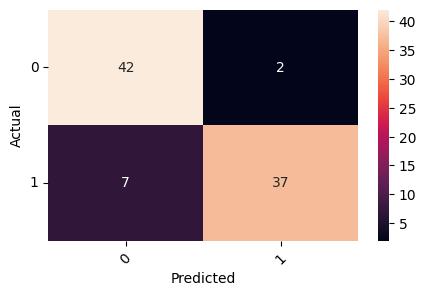

In [39]:
print('Accuracy Score is : ',round(accuracy_score(y_test, KNN_model.predict(x_test)),4)*100)
print('Precision Score is : ',round(precision_score(y_test, KNN_model.predict(x_test)),4)*100)
print('Recall Score is : ',round(recall_score(y_test, KNN_model.predict(x_test)),4)*100)
print('F1 Score is : ',round(f1_score(y_test, KNN_model.predict(x_test)),4)*100)
print('Confusion Matrix is:')
plt.figure(figsize=(5,3))
sns.heatmap(confusion_matrix(y_test, KNN_model.predict(x_test)), annot=True)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()